Minimum:
0    1.711224
dtype: float64
Maximum:
0    17092.306826
dtype: float64
Mean:
0    7.341425
dtype: float64
Varience:
0    15761.214072
dtype: float64


C:\Users\Nil\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


286.828395505125
0


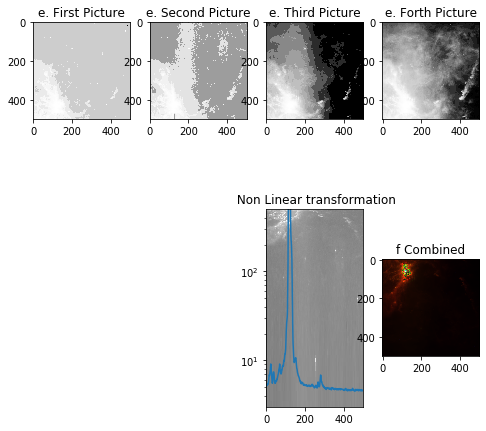

In [10]:
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd 
from numpy import array
from PIL import Image
import collections

def getData(filename):
    f = open(filename, "r")
    data = {}
    dataArray = f.read().split()
    for i in range(0,500):
        currentLine = dataArray[i]
        for j in range(0,500):
            a = str(currentLine).replace('"', '').split(',')[j]
            if ('+' in a):
                c, b = a.split("E+")
                c = c.replace("b\'", "")
                b = b.replace("'", "")
                data[i, j] = float(c) * math.pow(10, float(b))
            else:
                c, b = a.split("E-")
                c = c.replace("b\'", "")
                b = b.replace("'", "")
                data[i, j] = float(c) * math.pow(10, float(b) * (-1))
    f.close()
    return data


myData1 = getData("orion/i170b1h0_t0.txt")
myData2 = getData("orion/i170b2h0_t0.txt")
myData3 = getData("orion/i170b3h0_t0.txt")
myData4 = getData("orion/i170b4h0_t0.txt")



fig = plt.figure(figsize=(8, 8))


##################
#Task a) #########
##################
b = pd.DataFrame(list(myData2.values()))

print("Minimum:")
minimum = b.min()

print(minimum)

maximum = b.max()
print("Maximum:")

print(maximum)

men = b.mean()
print("Mean:")
print(men)

varience = b.var()
print("Varience:")
print(varience)

##################
#Task b) #########
##################



def MaximumLine():
    maxval = 17092.306826
    maxLine = 0
    for i in range(0,500):
        for j in range(0,500):
            if maxval == myData2[i,j]:
                maxLine = i
    return maxLine

a = {}
for i in range(0,500):
    a[i] = myData2[MaximumLine(), i]
    
fig.add_subplot(2, 4, 7)
plt.title('b profile line')
plt.yscale('log')
plt.plot([f for f in a.values()])

##################
#Task d) #########
##################


nonLinear = {}
ceiling = 9
floor = 2.5

for i in range(0,500):
    for j in range(0,500):
        if (myData2[i,j]>ceiling):
            nonLinear[i,j] = 200
        elif (myData2[i,j]<floor):
            nonLinear[i,j] = 0
        else:
            nonLinear[i,j] = myData2[i,j]*(255/8)
        


plt.title(' Non Linear transformation')
plt.imshow(array([v for v in nonLinear.values()]).reshape(500, 500), cmap="gray", origin='lower')

allvalues = nonLinear.values()
max_value = max(allvalues)

print(max_value)

min_value = min(allvalues)
print(min_value)

#################
#Task e)########
################

def equalizedHisto(data):
    maximum = data[0, 0]          
    histogram = {}                
    newHistogram = {}             
    equalizedHistogram = {}     

    for i in range(0,500):
        for j in range(0,500):
            if maximum < data[i, j]:
                maximum = data[i, j] # maximum value calculation
    i = 0
    while i < maximum:
        histogram[i] = 0
        i += 1
# frequency calculation
    for i in range(0,500):
        for j in range(0,500):
            histogram[int(data[i, j])] += 1

# logic for cm
    for i in range(0,len(histogram)):
        newHistogram[i] = 0
        
    
    newHistogram[0] = histogram[0]
    for i in range(1,len(histogram)):
        newHistogram[i] = histogram[i] + newHistogram[i - 1]
# final histogram equalized calculation    
    for i in range(0,500):
        for j in range(0,500):
            equalizedHistogram[i, j] = 255 * newHistogram[int(data[i, j])] / (500 * 500)

    return equalizedHistogram

fig.add_subplot(2, 4, 1)
plt.title('e. First Picture')
plt.imshow(np.reshape(list(equalizedHisto(myData1).values()), (500, 500)), cmap="gray")

fig.add_subplot(2, 4, 2)
plt.title('e. Second Picture')
plt.imshow(np.reshape(list(equalizedHisto(myData2).values()), (500, 500)), cmap="gray")

fig.add_subplot(2, 4, 3)
plt.title('e. Third Picture')
plt.imshow(np.reshape(list(equalizedHisto(myData3).values()), (500, 500)), cmap="gray")

fig.add_subplot(2, 4, 4)
plt.title('e. Forth Picture')
plt.imshow(np.reshape(list(equalizedHisto(myData4).values()), (500, 500)), cmap="gray")


##################
#Task f) #########
##################
#(f) Combine the histo-equalized data set to an RGB-image (b4=r, b3=g, b1=b).

rgb = np.zeros((500,500,3), 'uint8')

for i in range(0,500):
    for j in range(0,500):
        rgb[i,j, 0] = myData4[499-i,j]
        rgb[i,j, 1] = myData3[499-i,j]
        rgb[i,j, 2] = myData1[499-i,j]

img = Image.fromarray(rgb)

fig.add_subplot(2, 4, 8)
plt.title('f Combined')
plt.imshow(img)


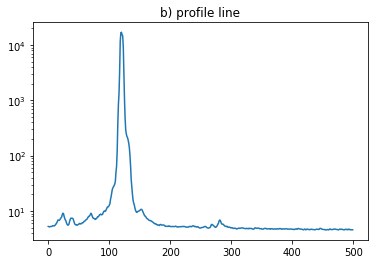

286.828395505125
0


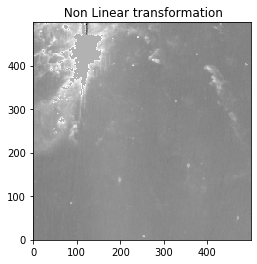

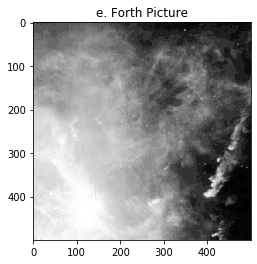

C:\Users\Nil\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


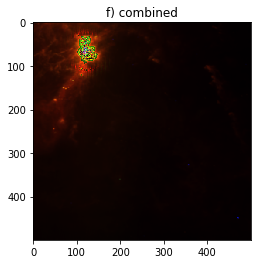